In [18]:
import sklearn.svm as svm
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn import model_selection, preprocessing
import collections
import pickle

img_dimension = 50

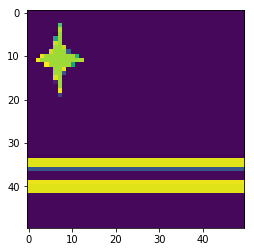

(50, 50)
2500


In [19]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (img_dimension, img_dimension)))[
    :, :, 0] for file in onlyfiles]  # screws up image color, but down to 2 dimensions
plt.imshow(images[0])
plt.show()
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

In [20]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = [div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})]
flags = [div.find("img")["src"][-11:-9] for div in html.find_all("div", attrs={"class": "flag-image"})]
map = {flags[i]: div_names[i] for i in range(len(flags))}
map = collections.OrderedDict(sorted(map.items()))
print(map)

OrderedDict([('AA', 'Aruba'), ('AC', 'Antigua and Barbuda'), ('AE', 'United Arab Emirates'), ('AF', 'Afghanistan'), ('AG', 'Algeria'), ('AJ', 'Azerbaijan'), ('AL', 'Albania'), ('AM', 'Armenia'), ('AN', 'Andorra'), ('AO', 'Angola'), ('AQ', 'American Samoa'), ('AR', 'Argentina'), ('AS', 'Australia'), ('AT', 'Ashmore and Cartier Islands'), ('AU', 'Austria'), ('AV', 'Anguilla'), ('AX', 'Akrotiri'), ('BA', 'Bahrain'), ('BB', 'Barbados'), ('BC', 'Botswana'), ('BD', 'Bermuda'), ('BE', 'Belgium'), ('BF', 'Bahamas, The'), ('BG', 'Bangladesh'), ('BH', 'Belize'), ('BK', 'Bosnia and Herzegovina'), ('BL', 'Bolivia'), ('BM', 'Burma'), ('BN', 'Benin'), ('BO', 'Belarus'), ('BP', 'Solomon Islands'), ('BQ', 'Navassa Island'), ('BR', 'Brazil'), ('BT', 'Bhutan'), ('BU', 'Bulgaria'), ('BV', 'Bouvet Island'), ('BX', 'Brunei'), ('BY', 'Burundi'), ('CA', 'Canada'), ('CB', 'Cambodia'), ('CD', 'Chad'), ('CE', 'Sri Lanka'), ('CF', 'Congo, Republic of the'), ('CG', 'Congo, Democratic Republic of the'), ('CH', 'Ch

                Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
0                 Aruba  0.301961  0.301961  0.301961  0.301961  0.301961   
1   Antigua and Barbuda  0.117647  0.000000  0.000000  0.000000  0.000000   
2  United Arab Emirates  0.745098  0.745098  0.745098  0.745098  0.745098   
3           Afghanistan  0.000000  0.000000  0.000000  0.000000  0.000000   
4               Algeria  0.000000  0.000000  0.000000  0.000000  0.000000   

    Pixel 6   Pixel 7   Pixel 8   Pixel 9     ...      Pixel 2491  Pixel 2492  \
0  0.301961  0.301961  0.301961  0.301961     ...        0.301961    0.301961   
1  0.000000  0.000000  0.000000  0.000000     ...        0.745098    0.745098   
2  0.745098  0.745098  0.745098  0.745098     ...        0.000000    0.000000   
3  0.000000  0.000000  0.000000  0.000000     ...        0.066667    0.066667   
4  0.000000  0.000000  0.000000  0.000000     ...        1.000000    1.000000   

   Pixel 2493  Pixel 2494  Pixel 2495  Pixel 2496 

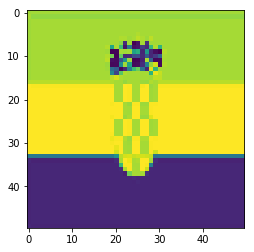

In [21]:
df = pd.DataFrame({"Country": [val for key, val in map.items()]})

for i in range(img_dimension**2):
    pixels = [images[x][int(i/img_dimension)][i%img_dimension] for x in range(len(images))]
    df["Pixel " + str(i + 1)] = np.array(pixels) / 255.0
print(df.head())
plt.imshow(images[100])
plt.show()

In [22]:
# If you're creating model for first time

# model = svm.SVC(gamma=0.001, C=1000)
# x = df[df.columns.values[1:]]
# y = df.Country
# model.fit(x, y)
# file = open("/Users/rohitneppalli/Downloads/svm_model", "wb")
# pickle.dump(model, file)
# file.close()

# Otherwise, load in model
file = open("/Users/rohitneppalli/Downloads/svm_model", "rb")
model = pickle.load(file)

In [24]:
img = "/Users/rohitneppalli/Downloads/ge.png"
img_array = np.array(cv2.resize(mpimg.imread(img, 0), (img_dimension, img_dimension)))[:, :, 0]
pixels = [img_array[int(i/img_dimension)][i % img_dimension] for i in range(img_dimension**2)]
pixels = np.array(pixels) / 255.0

print(model.predict(pixels.reshape(-1, img_dimension**2)))

['Germany']
